## Test Interplanetary Transfer

In [59]:
import matplotlib.pyplot as plt

In [60]:
import numpy as np

import astropy.units as u
from astropy import time

from poliastro import iod
from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver

In [61]:
import plotly.io as pio
# pio.renderers.default = "notebook_connected"

In [62]:
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")

<ScienceState solar_system_ephemeris: 'jpl'>

In [63]:
# Initial data

date_launch = time.Time("2011-11-26 15:02", scale="utc")
date_arrival = time.Time("2012-08-06 05:17", scale="utc")

In [64]:

# Solve for departure and target orbits
ss_earth = Orbit.from_body_ephem(Earth, date_launch)
ss_mars = Orbit.from_body_ephem(Mars, date_arrival)

/Users/lei.ma/opt/anaconda3/envs/interplanetary-logistics/lib/python3.7/site-packages/poliastro/twobody/orbit.py:416: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2011-11-26 15:03:06.183. Use Time(..., scale='tdb') instead.

/Users/lei.ma/opt/anaconda3/envs/interplanetary-logistics/lib/python3.7/site-packages/poliastro/twobody/orbit.py:416: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2012-08-06 05:18:07.183. Use Time(..., scale='tdb') instead.



In [65]:

# Solve for the transfer maneuver
man_lambert = Maneuver.lambert(ss_earth, ss_mars)

# Get the transfer and final orbits
ss_trans, ss_target = ss_earth.apply_maneuver(man_lambert, intermediate=True)

Test different times

In [119]:
# Initial data

launch_time_str = "2011-11-26 15:02"
arrival_time_str = "2012-08-06 05:17"


def total_cost(launch, arrival):
    
    date_launch = time.Time(launch, scale="utc")
    date_arrival = time.Time(arrival, scale="utc")


    # Solve for departure and target orbits
    ss_earth = Orbit.from_body_ephem(Earth, date_launch)
    ss_mars = Orbit.from_body_ephem(Mars, date_arrival)

    # Solve for the transfer maneuver
    man_lambert = Maneuver.lambert(ss_earth, ss_mars)

    return man_lambert.get_total_cost().value, man_lambert.get_total_time().value

In [126]:
arrival_list = [
    "2012-08-01", "2012-09-01", "2012-10-01", "2012-11-01", "2012-12-01", "2013-01-01", "2013-02-01", 
    "2013-03-01", "2013-04-01", "2013-05-01", "2013-06-01", "2013-07-01", "2013-08-01", "2013-09-01", 
    "2013-10-01", "2013-11-01", "2013-12-01", "2014-01-01", "2014-02-01", "2014-03-01", "2014-04-01", 
    "2014-05-01", "2014-06-01", "2014-07-01", "2014-08-01", "2014-09-01", "2014-10-01", "2014-11-01", 
    "2014-12-01", "2015-01-01", "2015-02-01", "2015-03-01", "2015-04-01", 
    "2015-05-01", "2015-06-01", "2015-07-01", "2015-08-01", "2015-09-01", "2015-10-01", "2015-11-01", 
    "2015-12-01", "2016-01-01", "2016-02-01", "2016-03-01", "2016-04-01", 
    "2016-05-01", "2016-06-01", "2016-07-01", "2016-08-01", "2016-09-01", "2016-10-01", "2016-11-01", "2016-12-01"
]
cost_list = [total_cost(launch_time_str, i)[0] for i in arrival_list]

/Users/lei.ma/opt/anaconda3/envs/interplanetary-logistics/lib/python3.7/site-packages/poliastro/twobody/orbit.py:416: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2016-01-01 00:01:08.184. Use Time(..., scale='tdb') instead.

/Users/lei.ma/opt/anaconda3/envs/interplanetary-logistics/lib/python3.7/site-packages/poliastro/twobody/orbit.py:416: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2016-02-01 00:01:08.185. Use Time(..., scale='tdb') instead.

/Users/lei.ma/opt/anaconda3/envs/interplanetary-logistics/lib/python3.7/site-packages/poliastro/twobody/orbit.py:416: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2016-03-01 00:01:08.185. Use Time(..., scale='tdb') instead.

/Users/lei.ma/opt/anaconda3/envs/interplanetary-logistics/lib/python3.7/site-packages/poliastro/twobody/orbit.py:416: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2016-04-01 00:01:08.186. Use Time(..., scale='tdb') instead.



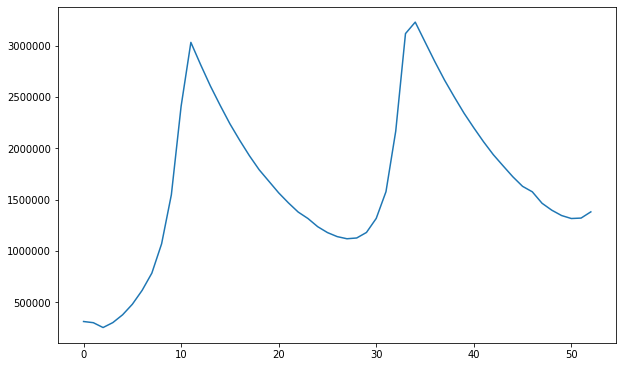

In [127]:
fig, ax = plt.subplots(figsize=(10,6.18))
ax.plot(
    range(len(arrival_list)), cost_list
)

In [128]:
def pricing(cost):

    return cost/500000 * 10000

In [130]:
price_list = [pricing(i) for i in cost_list]

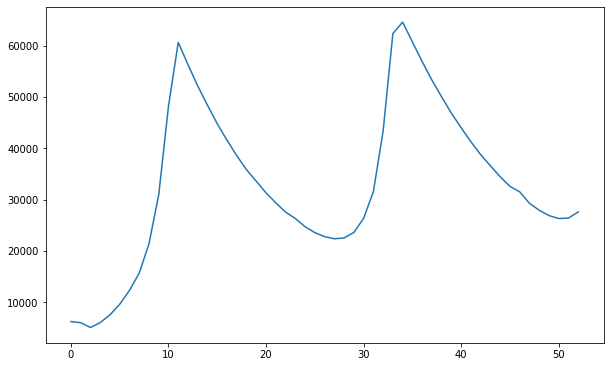

In [131]:
fig, ax = plt.subplots(figsize=(10,6.18))
ax.plot(
    range(len(arrival_list)), price_list
)

## Porkchop

In [141]:

import astropy.units as u

from poliastro.plotting.porkchop import porkchop
from poliastro.bodies import Earth, Mars
from poliastro.util import time_range

launch_span = time_range("2020-01-01", end="2020-12-30")
arrival_span = time_range("2020-07-01", end="2021-12-30")

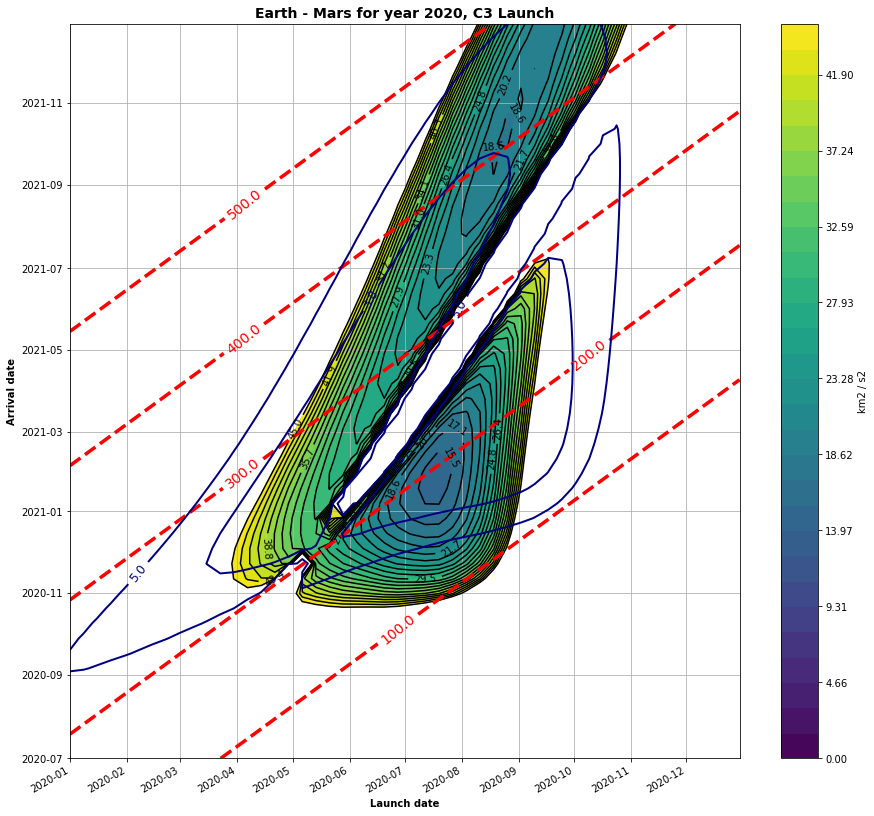

In [142]:
dv_dpt, dv_arr, c3dpt, c3arr, tof = porkchop(Earth, Mars,
                                             launch_span, arrival_span)

In [145]:
(
    dv_dpt, dv_arr
)

(<Quantity [[11.15325907, 11.53630604, 12.06239928, ...,         nan,
                     nan,         nan],
            [10.31117738, 10.57377964, 10.92461593, ...,         nan,
                     nan,         nan],
            [ 9.65885894,  9.82491465, 10.05776187, ...,         nan,
                     nan,         nan],
            ...,
            [23.88148978, 25.1307527 , 26.38608333, ..., 13.14080728,
             14.27888198, 15.44352435],
            [23.08116035, 24.31188711, 25.54897046, ..., 12.64219543,
             13.74586354, 14.87454587],
            [22.28260057, 23.494077  , 24.71215503, ..., 12.14744964,
             13.21671841, 14.3098975 ]] km / s>,
 <Quantity [[10.1143657 , 10.8431852 , 11.67005249, ...,         nan,
                     nan,         nan],
            [ 8.71963337,  9.33096248, 10.00679383, ...,         nan,
                     nan,         nan],
            [ 7.52771506,  8.03478619,  8.59451517, ...,         nan,
                     nan

In [146]:
(
    c3dpt, c3arr, tof
)

(<Quantity [[124.39518787, 133.08635697, 145.50147638, ...,          nan,
                      nan,          nan],
            [106.320379  , 111.80481591, 119.34723313, ...,          nan,
                      nan,          nan],
            [ 93.29355604,  96.52894787, 101.15857377, ...,          nan,
                      nan,          nan],
            ...,
            [570.32555388, 631.55473142, 696.22539356, ..., 172.68081594,
             203.8864706 , 238.50244449],
            [532.73996291, 591.06785499, 652.74989141, ..., 159.82510538,
             188.94876445, 221.25211487],
            [496.5142883 , 551.97165397, 610.69060613, ..., 147.56053285,
             174.68164556, 204.77316657]] km2 / s2>,
 <Quantity [[102.30039343, 117.57466521, 136.19012503, ...,          nan,
                      nan,          nan],
            [ 76.03200619,  87.06686077, 100.13592285, ...,          nan,
                      nan,          nan],
            [ 56.666494  ,  64.55778916,  73

## Experiment

In [66]:
ss_trans

1 x 2 AU x 22.9 deg (HCRS) orbit around Sun (☉) at epoch 2011-11-26 15:03:06.183 (TDB)

In [67]:
ss_target

1 x 2 AU x 24.7 deg (HCRS) orbit around Sun (☉) at epoch 2012-08-06 05:18:07.183 (TDB)

In [68]:
ss_trans.epoch

<Time object: scale='tdb' format='iso' value=2011-11-26 15:03:06.183>

In [81]:
ss_trans.e_vec

<Quantity [0.13081709, 0.16332549, 0.07185308]>

In [82]:
ss_trans.energy

<Quantity -2.62693208e+12 km2 / d2>

In [83]:
ss_target.epoch

<Time object: scale='tdb' format='iso' value=2012-08-06 05:18:07.183>

In [71]:
man_lambert.get_total_cost()

<Quantity 308574.16779231 km / s>

In [72]:
man_lambert.get_total_time()

<Quantity 21910501.00019529 s>

In [88]:
man_lambert.get_total_cost()

<Quantity 308574.16779231 km / s>

In [94]:
man_lambert.get_total_time()

<Quantity 21910501.00019529 s>

In [89]:
ss_earth.v

<Quantity [-2352414.27027126,  1032013.3380897 ,   447276.92493007] km / d>

In [90]:
ss_mars.v

<Quantity [1809889.79424678, -891472.38467096, -457760.36376408] km / d>

In [91]:
ss_trans.v

<Quantity [-2530774.63424328,  1255583.91814106,   467978.49173361] km / d>

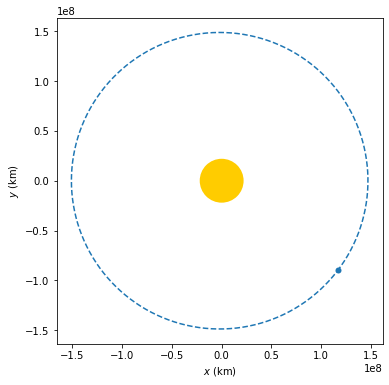

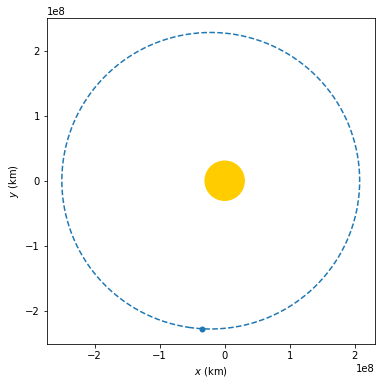

In [73]:
# fig, ax = plt.subplots()
ss_earth.plot()
ss_mars.plot()

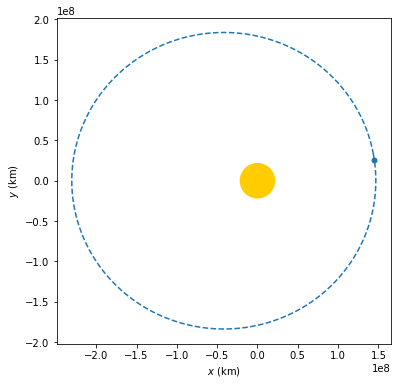

In [74]:
ss_trans.plot()

In [34]:
from poliastro.plotting import OrbitPlotter3D

In [75]:
plotter = OrbitPlotter3D()
plotter.plot(ss_earth, label="Earth at launch position", color="navy")
plotter.plot(ss_mars, label="Mars at arrival position", color="red")
plotter.plot_trajectory(ss_trans.sample(max_anomaly=180*u.deg).cartesian, color="black", label="Transfer orbit")
plotter.set_view(30 * u.deg, 260 * u.deg, distance=3 * u.km)